In [73]:
####numerical exploration on the number of circuit layers for a target accuracy in the simualtion of NOESY spectrum...

import openfermion as of

import sys
sys.path.append('./utils/')

from basis_utils import Sz,Sx,Sz, Sy
from basis_utils import read_spinach_info, build_list_ISTs, NormalizeBasis, build_symbolic_list_ISTs, MatRepLib
from simulation_utils import GenH0_Ham, HamMatRep, GenNOESYSpectrum, sqcosbell_2d_apod, GenFIDsignals
import scipy.io as spio
#from 
from scipy.linalg import expm
import cirq
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import savemat
import pickle

from matplotlib.colors import TwoSlopeNorm



In [74]:
text4="""1      (0,0)   (0,0)   (0,0)   (0,0)   
  2      (0,0)   (0,0)   (0,0)   (1,1)   
  3      (0,0)   (0,0)   (0,0)   (1,0)   
  4      (0,0)   (0,0)   (0,0)   (1,-1)  
  5      (0,0)   (0,0)   (1,1)   (0,0)   
  6      (0,0)   (0,0)   (1,1)   (1,1)   
  7      (0,0)   (0,0)   (1,1)   (1,0)   
  8      (0,0)   (0,0)   (1,1)   (1,-1)  
  9      (0,0)   (0,0)   (1,0)   (0,0)   
  10     (0,0)   (0,0)   (1,0)   (1,1)   
  11     (0,0)   (0,0)   (1,0)   (1,0)   
  12     (0,0)   (0,0)   (1,0)   (1,-1)  
  13     (0,0)   (0,0)   (1,-1)  (0,0)   
  14     (0,0)   (0,0)   (1,-1)  (1,1)   
  15     (0,0)   (0,0)   (1,-1)  (1,0)   
  16     (0,0)   (0,0)   (1,-1)  (1,-1)  
  17     (0,0)   (1,1)   (0,0)   (0,0)   
  18     (0,0)   (1,1)   (0,0)   (1,1)   
  19     (0,0)   (1,1)   (0,0)   (1,0)   
  20     (0,0)   (1,1)   (0,0)   (1,-1)  
  21     (0,0)   (1,1)   (1,1)   (0,0)   
  22     (0,0)   (1,1)   (1,1)   (1,1)   
  23     (0,0)   (1,1)   (1,1)   (1,0)   
  24     (0,0)   (1,1)   (1,1)   (1,-1)  
  25     (0,0)   (1,1)   (1,0)   (0,0)   
  26     (0,0)   (1,1)   (1,0)   (1,1)   
  27     (0,0)   (1,1)   (1,0)   (1,0)   
  28     (0,0)   (1,1)   (1,0)   (1,-1)  
  29     (0,0)   (1,1)   (1,-1)  (0,0)   
  30     (0,0)   (1,1)   (1,-1)  (1,1)   
  31     (0,0)   (1,1)   (1,-1)  (1,0)   
  32     (0,0)   (1,1)   (1,-1)  (1,-1)  
  33     (0,0)   (1,0)   (0,0)   (0,0)   
  34     (0,0)   (1,0)   (0,0)   (1,1)   
  35     (0,0)   (1,0)   (0,0)   (1,0)   
  36     (0,0)   (1,0)   (0,0)   (1,-1)  
  37     (0,0)   (1,0)   (1,1)   (0,0)   
  38     (0,0)   (1,0)   (1,1)   (1,1)   
  39     (0,0)   (1,0)   (1,1)   (1,0)   
  40     (0,0)   (1,0)   (1,1)   (1,-1)  
  41     (0,0)   (1,0)   (1,0)   (0,0)   
  42     (0,0)   (1,0)   (1,0)   (1,1)   
  43     (0,0)   (1,0)   (1,0)   (1,0)   
  44     (0,0)   (1,0)   (1,0)   (1,-1)  
  45     (0,0)   (1,0)   (1,-1)  (0,0)   
  46     (0,0)   (1,0)   (1,-1)  (1,1)   
  47     (0,0)   (1,0)   (1,-1)  (1,0)   
  48     (0,0)   (1,0)   (1,-1)  (1,-1)  
  49     (0,0)   (1,-1)  (0,0)   (0,0)   
  50     (0,0)   (1,-1)  (0,0)   (1,1)   
  51     (0,0)   (1,-1)  (0,0)   (1,0)   
  52     (0,0)   (1,-1)  (0,0)   (1,-1)  
  53     (0,0)   (1,-1)  (1,1)   (0,0)   
  54     (0,0)   (1,-1)  (1,1)   (1,1)   
  55     (0,0)   (1,-1)  (1,1)   (1,0)   
  56     (0,0)   (1,-1)  (1,1)   (1,-1)  
  57     (0,0)   (1,-1)  (1,0)   (0,0)   
  58     (0,0)   (1,-1)  (1,0)   (1,1)   
  59     (0,0)   (1,-1)  (1,0)   (1,0)   
  60     (0,0)   (1,-1)  (1,0)   (1,-1)  
  61     (0,0)   (1,-1)  (1,-1)  (0,0)   
  62     (0,0)   (1,-1)  (1,-1)  (1,1)   
  63     (0,0)   (1,-1)  (1,-1)  (1,0)   
  64     (0,0)   (1,-1)  (1,-1)  (1,-1)  
  65     (1,1)   (0,0)   (0,0)   (0,0)   
  66     (1,1)   (0,0)   (0,0)   (1,1)   
  67     (1,1)   (0,0)   (0,0)   (1,0)   
  68     (1,1)   (0,0)   (0,0)   (1,-1)  
  69     (1,1)   (0,0)   (1,1)   (0,0)   
  70     (1,1)   (0,0)   (1,1)   (1,1)   
  71     (1,1)   (0,0)   (1,1)   (1,0)   
  72     (1,1)   (0,0)   (1,1)   (1,-1)  
  73     (1,1)   (0,0)   (1,0)   (0,0)   
  74     (1,1)   (0,0)   (1,0)   (1,1)   
  75     (1,1)   (0,0)   (1,0)   (1,0)   
  76     (1,1)   (0,0)   (1,0)   (1,-1)  
  77     (1,1)   (0,0)   (1,-1)  (0,0)   
  78     (1,1)   (0,0)   (1,-1)  (1,1)   
  79     (1,1)   (0,0)   (1,-1)  (1,0)   
  80     (1,1)   (0,0)   (1,-1)  (1,-1)  
  81     (1,1)   (1,1)   (0,0)   (0,0)   
  82     (1,1)   (1,1)   (0,0)   (1,1)   
  83     (1,1)   (1,1)   (0,0)   (1,0)   
  84     (1,1)   (1,1)   (0,0)   (1,-1)  
  85     (1,1)   (1,1)   (1,1)   (0,0)   
  86     (1,1)   (1,1)   (1,1)   (1,1)   
  87     (1,1)   (1,1)   (1,1)   (1,0)   
  88     (1,1)   (1,1)   (1,1)   (1,-1)  
  89     (1,1)   (1,1)   (1,0)   (0,0)   
  90     (1,1)   (1,1)   (1,0)   (1,1)   
  91     (1,1)   (1,1)   (1,0)   (1,0)   
  92     (1,1)   (1,1)   (1,0)   (1,-1)  
  93     (1,1)   (1,1)   (1,-1)  (0,0)   
  94     (1,1)   (1,1)   (1,-1)  (1,1)   
  95     (1,1)   (1,1)   (1,-1)  (1,0)   
  96     (1,1)   (1,1)   (1,-1)  (1,-1)  
  97     (1,1)   (1,0)   (0,0)   (0,0)   
  98     (1,1)   (1,0)   (0,0)   (1,1)   
  99     (1,1)   (1,0)   (0,0)   (1,0)   
  100    (1,1)   (1,0)   (0,0)   (1,-1)  
  101    (1,1)   (1,0)   (1,1)   (0,0)   
  102    (1,1)   (1,0)   (1,1)   (1,1)   
  103    (1,1)   (1,0)   (1,1)   (1,0)   
  104    (1,1)   (1,0)   (1,1)   (1,-1)  
  105    (1,1)   (1,0)   (1,0)   (0,0)   
  106    (1,1)   (1,0)   (1,0)   (1,1)   
  107    (1,1)   (1,0)   (1,0)   (1,0)   
  108    (1,1)   (1,0)   (1,0)   (1,-1)  
  109    (1,1)   (1,0)   (1,-1)  (0,0)   
  110    (1,1)   (1,0)   (1,-1)  (1,1)   
  111    (1,1)   (1,0)   (1,-1)  (1,0)   
  112    (1,1)   (1,0)   (1,-1)  (1,-1)  
  113    (1,1)   (1,-1)  (0,0)   (0,0)   
  114    (1,1)   (1,-1)  (0,0)   (1,1)   
  115    (1,1)   (1,-1)  (0,0)   (1,0)   
  116    (1,1)   (1,-1)  (0,0)   (1,-1)  
  117    (1,1)   (1,-1)  (1,1)   (0,0)   
  118    (1,1)   (1,-1)  (1,1)   (1,1)   
  119    (1,1)   (1,-1)  (1,1)   (1,0)   
  120    (1,1)   (1,-1)  (1,1)   (1,-1)  
  121    (1,1)   (1,-1)  (1,0)   (0,0)   
  122    (1,1)   (1,-1)  (1,0)   (1,1)   
  123    (1,1)   (1,-1)  (1,0)   (1,0)   
  124    (1,1)   (1,-1)  (1,0)   (1,-1)  
  125    (1,1)   (1,-1)  (1,-1)  (0,0)   
  126    (1,1)   (1,-1)  (1,-1)  (1,1)   
  127    (1,1)   (1,-1)  (1,-1)  (1,0)   
  128    (1,1)   (1,-1)  (1,-1)  (1,-1)  
  129    (1,0)   (0,0)   (0,0)   (0,0)   
  130    (1,0)   (0,0)   (0,0)   (1,1)   
  131    (1,0)   (0,0)   (0,0)   (1,0)   
  132    (1,0)   (0,0)   (0,0)   (1,-1)  
  133    (1,0)   (0,0)   (1,1)   (0,0)   
  134    (1,0)   (0,0)   (1,1)   (1,1)   
  135    (1,0)   (0,0)   (1,1)   (1,0)   
  136    (1,0)   (0,0)   (1,1)   (1,-1)  
  137    (1,0)   (0,0)   (1,0)   (0,0)   
  138    (1,0)   (0,0)   (1,0)   (1,1)   
  139    (1,0)   (0,0)   (1,0)   (1,0)   
  140    (1,0)   (0,0)   (1,0)   (1,-1)  
  141    (1,0)   (0,0)   (1,-1)  (0,0)   
  142    (1,0)   (0,0)   (1,-1)  (1,1)   
  143    (1,0)   (0,0)   (1,-1)  (1,0)   
  144    (1,0)   (0,0)   (1,-1)  (1,-1)  
  145    (1,0)   (1,1)   (0,0)   (0,0)   
  146    (1,0)   (1,1)   (0,0)   (1,1)   
  147    (1,0)   (1,1)   (0,0)   (1,0)   
  148    (1,0)   (1,1)   (0,0)   (1,-1)  
  149    (1,0)   (1,1)   (1,1)   (0,0)   
  150    (1,0)   (1,1)   (1,1)   (1,1)   
  151    (1,0)   (1,1)   (1,1)   (1,0)   
  152    (1,0)   (1,1)   (1,1)   (1,-1)  
  153    (1,0)   (1,1)   (1,0)   (0,0)   
  154    (1,0)   (1,1)   (1,0)   (1,1)   
  155    (1,0)   (1,1)   (1,0)   (1,0)   
  156    (1,0)   (1,1)   (1,0)   (1,-1)  
  157    (1,0)   (1,1)   (1,-1)  (0,0)   
  158    (1,0)   (1,1)   (1,-1)  (1,1)   
  159    (1,0)   (1,1)   (1,-1)  (1,0)   
  160    (1,0)   (1,1)   (1,-1)  (1,-1)  
  161    (1,0)   (1,0)   (0,0)   (0,0)   
  162    (1,0)   (1,0)   (0,0)   (1,1)   
  163    (1,0)   (1,0)   (0,0)   (1,0)   
  164    (1,0)   (1,0)   (0,0)   (1,-1)  
  165    (1,0)   (1,0)   (1,1)   (0,0)   
  166    (1,0)   (1,0)   (1,1)   (1,1)   
  167    (1,0)   (1,0)   (1,1)   (1,0)   
  168    (1,0)   (1,0)   (1,1)   (1,-1)  
  169    (1,0)   (1,0)   (1,0)   (0,0)   
  170    (1,0)   (1,0)   (1,0)   (1,1)   
  171    (1,0)   (1,0)   (1,0)   (1,0)   
  172    (1,0)   (1,0)   (1,0)   (1,-1)  
  173    (1,0)   (1,0)   (1,-1)  (0,0)   
  174    (1,0)   (1,0)   (1,-1)  (1,1)   
  175    (1,0)   (1,0)   (1,-1)  (1,0)   
  176    (1,0)   (1,0)   (1,-1)  (1,-1)  
  177    (1,0)   (1,-1)  (0,0)   (0,0)   
  178    (1,0)   (1,-1)  (0,0)   (1,1)   
  179    (1,0)   (1,-1)  (0,0)   (1,0)   
  180    (1,0)   (1,-1)  (0,0)   (1,-1)  
  181    (1,0)   (1,-1)  (1,1)   (0,0)   
  182    (1,0)   (1,-1)  (1,1)   (1,1)   
  183    (1,0)   (1,-1)  (1,1)   (1,0)   
  184    (1,0)   (1,-1)  (1,1)   (1,-1)  
  185    (1,0)   (1,-1)  (1,0)   (0,0)   
  186    (1,0)   (1,-1)  (1,0)   (1,1)   
  187    (1,0)   (1,-1)  (1,0)   (1,0)   
  188    (1,0)   (1,-1)  (1,0)   (1,-1)  
  189    (1,0)   (1,-1)  (1,-1)  (0,0)   
  190    (1,0)   (1,-1)  (1,-1)  (1,1)   
  191    (1,0)   (1,-1)  (1,-1)  (1,0)   
  192    (1,0)   (1,-1)  (1,-1)  (1,-1)  
  193    (1,-1)  (0,0)   (0,0)   (0,0)   
  194    (1,-1)  (0,0)   (0,0)   (1,1)   
  195    (1,-1)  (0,0)   (0,0)   (1,0)   
  196    (1,-1)  (0,0)   (0,0)   (1,-1)  
  197    (1,-1)  (0,0)   (1,1)   (0,0)   
  198    (1,-1)  (0,0)   (1,1)   (1,1)   
  199    (1,-1)  (0,0)   (1,1)   (1,0)   
  200    (1,-1)  (0,0)   (1,1)   (1,-1)  
  201    (1,-1)  (0,0)   (1,0)   (0,0)   
  202    (1,-1)  (0,0)   (1,0)   (1,1)   
  203    (1,-1)  (0,0)   (1,0)   (1,0)   
  204    (1,-1)  (0,0)   (1,0)   (1,-1)  
  205    (1,-1)  (0,0)   (1,-1)  (0,0)   
  206    (1,-1)  (0,0)   (1,-1)  (1,1)   
  207    (1,-1)  (0,0)   (1,-1)  (1,0)   
  208    (1,-1)  (0,0)   (1,-1)  (1,-1)  
  209    (1,-1)  (1,1)   (0,0)   (0,0)   
  210    (1,-1)  (1,1)   (0,0)   (1,1)   
  211    (1,-1)  (1,1)   (0,0)   (1,0)   
  212    (1,-1)  (1,1)   (0,0)   (1,-1)  
  213    (1,-1)  (1,1)   (1,1)   (0,0)   
  214    (1,-1)  (1,1)   (1,1)   (1,1)   
  215    (1,-1)  (1,1)   (1,1)   (1,0)   
  216    (1,-1)  (1,1)   (1,1)   (1,-1)  
  217    (1,-1)  (1,1)   (1,0)   (0,0)   
  218    (1,-1)  (1,1)   (1,0)   (1,1)   
  219    (1,-1)  (1,1)   (1,0)   (1,0)   
  220    (1,-1)  (1,1)   (1,0)   (1,-1)  
  221    (1,-1)  (1,1)   (1,-1)  (0,0)   
  222    (1,-1)  (1,1)   (1,-1)  (1,1)   
  223    (1,-1)  (1,1)   (1,-1)  (1,0)   
  224    (1,-1)  (1,1)   (1,-1)  (1,-1)  
  225    (1,-1)  (1,0)   (0,0)   (0,0)   
  226    (1,-1)  (1,0)   (0,0)   (1,1)   
  227    (1,-1)  (1,0)   (0,0)   (1,0)   
  228    (1,-1)  (1,0)   (0,0)   (1,-1)  
  229    (1,-1)  (1,0)   (1,1)   (0,0)   
  230    (1,-1)  (1,0)   (1,1)   (1,1)   
  231    (1,-1)  (1,0)   (1,1)   (1,0)   
  232    (1,-1)  (1,0)   (1,1)   (1,-1)  
  233    (1,-1)  (1,0)   (1,0)   (0,0)   
  234    (1,-1)  (1,0)   (1,0)   (1,1)   
  235    (1,-1)  (1,0)   (1,0)   (1,0)   
  236    (1,-1)  (1,0)   (1,0)   (1,-1)  
  237    (1,-1)  (1,0)   (1,-1)  (0,0)   
  238    (1,-1)  (1,0)   (1,-1)  (1,1)   
  239    (1,-1)  (1,0)   (1,-1)  (1,0)   
  240    (1,-1)  (1,0)   (1,-1)  (1,-1)  
  241    (1,-1)  (1,-1)  (0,0)   (0,0)   
  242    (1,-1)  (1,-1)  (0,0)   (1,1)   
  243    (1,-1)  (1,-1)  (0,0)   (1,0)   
  244    (1,-1)  (1,-1)  (0,0)   (1,-1)  
  245    (1,-1)  (1,-1)  (1,1)   (0,0)   
  246    (1,-1)  (1,-1)  (1,1)   (1,1)   
  247    (1,-1)  (1,-1)  (1,1)   (1,0)   
  248    (1,-1)  (1,-1)  (1,1)   (1,-1)  
  249    (1,-1)  (1,-1)  (1,0)   (0,0)   
  250    (1,-1)  (1,-1)  (1,0)   (1,1)   
  251    (1,-1)  (1,-1)  (1,0)   (1,0)   
  252    (1,-1)  (1,-1)  (1,0)   (1,-1)  
  253    (1,-1)  (1,-1)  (1,-1)  (0,0)   
  254    (1,-1)  (1,-1)  (1,-1)  (1,1)   
  255    (1,-1)  (1,-1)  (1,-1)  (1,0)   
  256    (1,-1)  (1,-1)  (1,-1)  (1,-1)"""



In [76]:
data_ala = read_spinach_info(text4)

basis_ala = build_list_ISTs(data_ala)
prefacts,Symb_ALA_basis = build_symbolic_list_ISTs(data_ala)

#Normbasis = NormalizeBasis(basis,n_qubits=4,checkOrth=True) I have verified the orthonormalization of the basis
Normbasis_ala = NormalizeBasis(basis_ala,n_qubits=4,checkOrth=False)
Normbasis_ala = np.array(Normbasis_ala)

In [48]:
loadMat = spio.loadmat('./data/NOESYdata_ALA_withGradients.mat',squeeze_me=True)

t_grid1 = loadMat['p']['time_grid1'].item()
t_grid2 = loadMat['p']['time_grid2'].item()

R_ala = loadMat['p']['R'].item()
H_ala = loadMat['p']['H'].item().toarray()
rho0 = np.array(loadMat['p']['rho0'].item().toarray())

f = open('./data/ALA_JOps.pk','rb')
dat = pickle.load(f)

JumpOps = dat['JOps']



# Deterministic Trotter implementation

In [41]:
####To define a number of Trotter time steps for the timescales t1, t2, we first define an error budget based on the largest timescales of the experiment and setting a 
#maximum number of Trotter steps...

T1max = 0.256
T2max = 0.256

Ntrot_max = 10


R_trunc = np.copy(JumpOps[0])

for i in range(1,len(JumpOps)):
    R_trunc+=JumpOps[i]

delta_T = T1max/Ntrot_max

RefU = expm((-1j*H_ala+R_trunc)*delta_T)

TrotS = GetTrotStep(H_ala,JumpOps,delta_T)

Tar_eps = np.linalg.norm(RefU - TrotS)

Coeff  = Tar_eps/(T1max*delta_T)

###Acording to this simplified analysis, the number of Trotter steps for a fixed (upper bound) target error starts to be different than 1 only until reaching approx 0.1 s!




In [81]:
def GenNOESYSpectrum_fromFID(fid_temp_1, fid_temp_2, fid_temp_3, fid_temp_4,zerofill1,zerofill2,returnFID=True):

    #fid_temp_1, fid_temp_2, fid_temp_3, fid_temp_4 = GenFIDsignals(Ham,R,Tpts1,Tpts2,rho0,coil,tmix,dt1,dt2,Lx,Ly)
    
    fid_test_cos = fid_temp_1 - fid_temp_3
    fid_test_sin = fid_temp_2 - fid_temp_4

    fid_cos = sqcosbell_2d_apod(fid_test_cos)
    fid_sin = sqcosbell_2d_apod(fid_test_sin)

    f1_cos = np.real(np.fft.fftshift(np.fft.fft2(fid_cos,[zerofill2],[0]),[0]))
    f1_sin = np.real(np.fft.fftshift(np.fft.fft2(fid_sin,[zerofill2],[0]),[0]))


    f1_states = f1_cos-1j*f1_sin

    spectrum = np.fft.fftshift(np.fft.fft2(f1_states,[zerofill1],[1]),[1])
    if returnFID:
        ###NOTE: return the FID witouth post-processing
        return spectrum, fid_test_cos-1j*fid_test_sin
    else:
        return spectrum


def GetTrotStep(Ham,List_jumps,deltT):
    L_dt1 = expm(-1j*Ham*deltT)

    for i in range(len(List_jumps)):
        #print("Jump operator is",List_jumps[i])
        L_dt1 = expm(List_jumps[i]*deltT)@L_dt1

    return L_dt1


def Trot_evol(L_dt1,rho,Nsteps):

    Evol_rho = np.copy(rho)

    for i in range(Nsteps):
        Evol_rho = L_dt1@Evol_rho

    return Evol_rho


def Trot_evol_fixsteps(Ham,List_jumps,tar_T,Nsteps,rho):
    """
    Evolve the  initial density matrix rho using Nsteps Trotter steps for a target time tar_T 
    """

    deltT = tar_T/Nsteps
    Ldt = GetTrotStep(Ham,List_jumps,deltT)

    rho_t = Trot_evol(Ldt,rho,Nsteps)
    return rho_t

def Trot_evol_chooseStep(Ham,List_jumps,tar_T,DeltaT,rho):
    #Number of Trotter steps set by 

    Nsteps = int(np.ceil(tar_T/DeltaT))
    if Nsteps==0:
        deltT = 0.0
    else:
        deltT = tar_T/Nsteps
    Ldt = GetTrotStep(Ham,List_jumps,deltT)

    rho_t = Trot_evol(Ldt,rho,Nsteps)
    return rho_t



#def get_Nsteps(T,t_thresh):
#def get_deltT(T,Nsteps):
    """
    determine the time step for Trotterization given the target simulation time T, and the number of steps
    """

###This function takes too long to execute
def GenFID_Det_MinTrotsignals(Ham,List_jumps,T1,T2,rho0,coil,tmix,dt1,dt2,NTrotmax,Lx,Ly):
    """
    Implement a first-order deterministic Trotter simulation of the FID NOESY signals, to numerically explore optimization of number of Trotter steps needed in the simulation
    for a target precision. Here, we assume an exact time propagation during the mixing time scale, and propagation for t1, t2 is done trough a Trotterized deterministic formula
    Args:
    Ham: matrix representation of the "coherent" part of the Liouvillian superoperator
    List_jumps: list of the matrix representation of the jump operators
    T1: maximal simulation time for the first phase of the protocol
    T2: maximal simulation time for the second phase of the protocol
    rho0: initial density matrix vector
    coil: vector that represents the observable we trace over to compute FID
    tmix: total mixing time
    """

    #This is the convention for our Trotter step: apply first the coherent part of the super-Liouvillian operator, followed by the jump operators in the order they appear in the array...

    #L_dt1 = expm(-1j*Ham*dt1)

    #for i in range(len(List_jumps)):
        #print("Jump operator is",List_jumps[i])
    #    L_dt1 = expm(List_jumps[i]*dt1)@L_dt1

    R = np.copy(List_jumps[0])
    for i in range(len(List_jumps)-1):
        R+=List_jumps[i]

    #print("Difference between Trotterized and exact L_dt1: ",np.linalg.norm(L_dt1-expm((-1j*Ham+R)*dt1)))

    #L_dt2 = expm(-1j*Ham*dt2)

    #for i in range(len(List_jumps)):
    #    L_dt2 = expm(List_jumps[i]*dt2)@L_dt2

    #print("Difference between Trotterized and exact L_dt2: ",np.linalg.norm(L_dt2-expm((-1j*Ham+R)*dt2)))

    #Dim = Ham.shape[0]
    #Lnet = Ham+1j*R 
    #L_dt1 = expm(-1j*Lnet*dt1)
    #L_dt2 = expm(-1j*Lnet*dt2)
    L_mix = expm((-1j*Ham+R)*tmix)

    #for i in range(len(List_jumps)):
    #    L_dtmix=expm(List_jumps[i]*dtmix)@L_dtmix


    ###Number of Trotter steps for the simulation of the mixing free evolution...
    #Ntmix = int(np.floor(tmix/dtmix))
    #Number of Trotter steps for simulation of T1
    Tpts1 = int(np.floor(T1/dt1))
    Tpts2 = int(np.floor(T2/dt2))

    #print("Number of Trotter steps for simulation of T1",Tpts1)
    #print("Number of Trotter steps for simulation of T2",Tpts2)
    #print("Number of Trotter steps for simulation of tmix", Ntmix)
    
    pulse_mix = np.copy(L_mix)
    #for i in range(Ntmix):
    #    pulse_mix = L_dtmix@pulse_mix

    #print("Difference between Trotterized pulse_mix and reference pulse_mix:", np.linalg.norm(pulse_mix-expm((-1j*Ham+R)*dtmix)))


    pulse_90x = expm(-1j*Lx*np.pi/2)
    pulse_90y = expm(-1j*Ly*np.pi/2)
    pulse_90mx = expm(1j*Lx*np.pi/2)
    pulse_90my = expm(1j*Ly*np.pi/2)

    #First 90x pulse:
    rho_t = np.copy(rho0)
    rho_t = np.dot(pulse_90x,rho_t)

    rho_stack = []
    rho_stack.append(rho_t)

    rho_temp = np.copy(rho_t)


    for i in range(1,Tpts1):
        ####Here we apply a Trotterized evolution below or equal the number of Trotter steps NTrotmax
        rho_evol = Trot_evol_fixsteps(Ham,List_jumps,i*dt1,NTrotmax,rho_temp)

        #rho_temp = np.dot(L_dt1,rho_temp)
        #rho_stack.append(rho_temp)
        rho_stack.append(rho_evol)


    rho_stack1_1 = []
    rho_stack1_2 = []
    rho_stack1_3 = []
    rho_stack1_4 = []

    for i in range(Tpts1):
        rho_stack1_1.append(pulse_90y@pulse_mix@pulse_90x@rho_stack[i])
        rho_stack1_2.append(pulse_90y@pulse_mix@pulse_90y@rho_stack[i])
        rho_stack1_3.append(pulse_90y@pulse_mix@pulse_90mx@rho_stack[i])
        rho_stack1_4.append(pulse_90y@pulse_mix@pulse_90my@rho_stack[i])


    fid_temp_1 = np.zeros([Tpts2,Tpts1],dtype=complex)
    fid_temp_2 = np.zeros([Tpts2,Tpts1],dtype=complex)
    fid_temp_3 = np.zeros([Tpts2,Tpts1],dtype=complex)
    fid_temp_4 = np.zeros([Tpts2,Tpts1],dtype=complex)

    for i in range(Tpts1):
        rho1 = rho_stack1_1[i]
        rho2 = rho_stack1_2[i]
        rho3 = rho_stack1_3[i]
        rho4 = rho_stack1_4[i]

        for j in range(Tpts2):
            rho_ev_1 = Trot_evol_fixsteps(Ham,List_jumps,j*dt2,NTrotmax,rho1)

            fid_temp_1[j,i] = np.dot(coil,rho_ev_1)

            #rho1 = Trot_evol_fixsteps(Ham,List_jumps,j*dt2,NTrotmax,rho1)

            #rho1 = L_dt2@rho1
            rho_ev_2 = Trot_evol_fixsteps(Ham,List_jumps,j*dt2,NTrotmax,rho2)

            fid_temp_2[j,i] = np.dot(coil,rho_ev_2)
            #rho2 = L_dt2@rho2

            rho_ev_3 = Trot_evol_fixsteps(Ham,List_jumps,j*dt2,NTrotmax,rho3)
            fid_temp_3[j,i] = np.dot(coil,rho_ev_3)
            #rho3 = L_dt2@rho3
            rho_ev_4 = Trot_evol_fixsteps(Ham,List_jumps,j*dt2,Ntrot_max,rho4)
            fid_temp_4[j,i] = np.dot(coil,rho_ev_4)

            #rho4 = L_dt2@rho4
    
    return fid_temp_1, fid_temp_2, fid_temp_3, fid_temp_4


def GenFID_Det_ThreshTrotsignals(Ham,List_jumps,T1,T2,rho0,coil,tmix,dt1,dt2,DeltaT,Lx,Ly):
    """
    Implement a first-order deterministic Trotter simulation of the FID NOESY signals, to numerically explore optimization of number of Trotter steps needed in the simulation
    for a target precision. Here, we assume an exact time propagation during the mixing time scale, and propagation for t1, t2 is done trough a Trotterized deterministic formula
    Args:
    Ham: matrix representation of the "coherent" part of the Liouvillian superoperator
    List_jumps: list of the matrix representation of the jump operators
    T1: maximal simulation time for the first phase of the protocol
    T2: maximal simulation time for the second phase of the protocol
    rho0: initial density matrix vector
    coil: vector that represents the observable we trace over to compute FID
    tmix: total mixing time
    """

    #This is the convention for our Trotter step: apply first the coherent part of the super-Liouvillian operator, followed by the jump operators in the order they appear in the array...

    #L_dt1 = expm(-1j*Ham*dt1)

    #for i in range(len(List_jumps)):
        #print("Jump operator is",List_jumps[i])
    #    L_dt1 = expm(List_jumps[i]*dt1)@L_dt1

    R = np.copy(List_jumps[0])
    for i in range(len(List_jumps)-1):
        R+=List_jumps[i]

    #print("Difference between Trotterized and exact L_dt1: ",np.linalg.norm(L_dt1-expm((-1j*Ham+R)*dt1)))

    #L_dt2 = expm(-1j*Ham*dt2)

    #for i in range(len(List_jumps)):
    #    L_dt2 = expm(List_jumps[i]*dt2)@L_dt2

    #print("Difference between Trotterized and exact L_dt2: ",np.linalg.norm(L_dt2-expm((-1j*Ham+R)*dt2)))

    #Dim = Ham.shape[0]
    #Lnet = Ham+1j*R 
    #L_dt1 = expm(-1j*Lnet*dt1)
    #L_dt2 = expm(-1j*Lnet*dt2)
    L_mix = expm((-1j*Ham+R)*tmix)

    #for i in range(len(List_jumps)):
    #    L_dtmix=expm(List_jumps[i]*dtmix)@L_dtmix


    ###Number of Trotter steps for the simulation of the mixing free evolution...
    #Ntmix = int(np.floor(tmix/dtmix))
    #Number of Trotter steps for simulation of T1
    Tpts1 = int(np.floor(T1/dt1))
    Tpts2 = int(np.floor(T2/dt2))

    #print("Number of Trotter steps for simulation of T1",Tpts1)
    #print("Number of Trotter steps for simulation of T2",Tpts2)
    #print("Number of Trotter steps for simulation of tmix", Ntmix)
    
    pulse_mix = np.copy(L_mix)
    #for i in range(Ntmix):
    #    pulse_mix = L_dtmix@pulse_mix

    #print("Difference between Trotterized pulse_mix and reference pulse_mix:", np.linalg.norm(pulse_mix-expm((-1j*Ham+R)*dtmix)))


    pulse_90x = expm(-1j*Lx*np.pi/2)
    pulse_90y = expm(-1j*Ly*np.pi/2)
    pulse_90mx = expm(1j*Lx*np.pi/2)
    pulse_90my = expm(1j*Ly*np.pi/2)

    #First 90x pulse:
    rho_t = np.copy(rho0)
    rho_t = np.dot(pulse_90x,rho_t)

    rho_stack = []
    rho_stack.append(rho_t)

    rho_temp = np.copy(rho_t)


    for i in range(1,Tpts1):
        ####Here we apply a Trotterized evolution below or equal the number of Trotter steps NTrotmax
        #rho_evol = Trot_evol_fixsteps(Ham,List_jumps,i*dt1,NTrotmax,rho_temp)
        rho_evol = Trot_evol_chooseStep(Ham,List_jumps,i*dt1,DeltaT,rho_temp)

        #rho_temp = np.dot(L_dt1,rho_temp)
        #rho_stack.append(rho_temp)
        rho_stack.append(rho_evol)


    rho_stack1_1 = []
    rho_stack1_2 = []
    rho_stack1_3 = []
    rho_stack1_4 = []

    for i in range(Tpts1):
        rho_stack1_1.append(pulse_90y@pulse_mix@pulse_90x@rho_stack[i])
        rho_stack1_2.append(pulse_90y@pulse_mix@pulse_90y@rho_stack[i])
        rho_stack1_3.append(pulse_90y@pulse_mix@pulse_90mx@rho_stack[i])
        rho_stack1_4.append(pulse_90y@pulse_mix@pulse_90my@rho_stack[i])


    fid_temp_1 = np.zeros([Tpts2,Tpts1],dtype=complex)
    fid_temp_2 = np.zeros([Tpts2,Tpts1],dtype=complex)
    fid_temp_3 = np.zeros([Tpts2,Tpts1],dtype=complex)
    fid_temp_4 = np.zeros([Tpts2,Tpts1],dtype=complex)

    for i in range(Tpts1):
        rho1 = rho_stack1_1[i]
        rho2 = rho_stack1_2[i]
        rho3 = rho_stack1_3[i]
        rho4 = rho_stack1_4[i]

        for j in range(Tpts2):
            #rho_ev_1 = Trot_evol_fixsteps(Ham,List_jumps,j*dt2,NTrotmax,rho1)
            rho_ev_1 = Trot_evol_chooseStep(Ham,List_jumps,j*dt2,DeltaT,rho1)

            fid_temp_1[j,i] = np.dot(coil,rho_ev_1)

            #rho1 = Trot_evol_fixsteps(Ham,List_jumps,j*dt2,NTrotmax,rho1)

            #rho1 = L_dt2@rho1
            #rho_ev_2 = Trot_evol_fixsteps(Ham,List_jumps,j*dt2,NTrotmax,rho2)
            rho_ev_2 = Trot_evol_chooseStep(Ham,List_jumps,j*dt2,DeltaT,rho2)

            fid_temp_2[j,i] = np.dot(coil,rho_ev_2)
            #rho2 = L_dt2@rho2

            #rho_ev_3 = Trot_evol_fixsteps(Ham,List_jumps,j*dt2,NTrotmax,rho3)
            rho_ev_3 = Trot_evol_chooseStep(Ham,List_jumps,j*dt2,DeltaT,rho3)

            fid_temp_3[j,i] = np.dot(coil,rho_ev_3)
            #rho3 = L_dt2@rho3
            #rho_ev_4 = Trot_evol_fixsteps(Ham,List_jumps,j*dt2,Ntrot_max,rho4)
            rho_ev_4 = Trot_evol_chooseStep(Ham,List_jumps,j*dt2,DeltaT,rho4)
            fid_temp_4[j,i] = np.dot(coil,rho_ev_4)

            #rho4 = L_dt2@rho4
            #%if j%10==0:
            #    print("Finished:", i,j)
    
    return fid_temp_1, fid_temp_2, fid_temp_3, fid_temp_4





In [72]:
####Parameters of the simulation, notice that we have reduced the number of time steps  but keeping the 
#spacing sufficiently large as to avoid aliasing...

loadMat = spio.loadmat('./data/NOESYdata_ALA_withGradients.mat',squeeze_me=True)

#t_grid1 = loadMat['p']['time_grid1'].item()
#t_grid2 = loadMat['p']['time_grid2'].item()

#R_ala = loadMat['p']['R'].item()
H_ala = loadMat['p']['H'].item().toarray()

rho0 = np.array(loadMat['p']['rho0'].item().toarray())

coil = np.array(loadMat['p']['coil'].item())

Lx = loadMat['p']['Lx'].item().toarray() 
Ly = loadMat['p']['Ly'].item().toarray() 

###Dynamical evolution for calculation of 2D spectra...
#Tpts1 = len(t_grid1)
#Tpts2 = len(t_grid2)
#Parameters taken from Spinach script
tmix = 1.0
#dt1 = 0.25e-3
#dt2 = 0.25e-3
dt1 = 5e-3
dt2 = 5e-3
Tpts1 = 512
Tpts2 = 512


f = open('./data/ALA_JOps.pk','rb')
dat = pickle.load(f)

JumpOps = dat['JOps']

T1 = dt1*Tpts1
T2 = dt2*Tpts2

NTrotmax = 10

DeltaT = T1/NTrotmax

##Parameters for Fourier transform
#zerofill1 = 4096
#zerofill2 = 4096

#fid_temp_1, fid_temp_2, fid_temp_3, fid_temp_4 = GenFID_Det_MinTrotsignals(H_ala,JumpOps,T1,T2,rho0,coil,tmix,dt1,dt2,NTrotmax,Lx,Ly)
fid_temp_1, fid_temp_2, fid_temp_3, fid_temp_4= GenFID_Det_ThreshTrotsignals(H_ala,JumpOps,T1,T2,rho0,coil,tmix,dt1,dt2,DeltaT,Lx,Ly)

/var/folders/rm/xdxcjr7n7_13f9m1905zyf6c0000gq/T/ipykernel_96194/424486808.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fid_temp_1[j,i] = np.dot(coil,rho_ev_1)
/var/folders/rm/xdxcjr7n7_13f9m1905zyf6c0000gq/T/ipykernel_96194/424486808.py:309: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fid_temp_2[j,i] = np.dot(coil,rho_ev_2)
/var/folders/rm/xdxcjr7n7_13f9m1905zyf6c0000gq/T/ipykernel_96194/424486808.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fi

Finished: 0 0
Finished: 0 10
Finished: 0 20
Finished: 0 30
Finished: 0 40
Finished: 0 50
Finished: 0 60
Finished: 0 70
Finished: 0 80
Finished: 0 90
Finished: 0 100
Finished: 0 110
Finished: 0 120
Finished: 0 130
Finished: 0 140
Finished: 0 150
Finished: 0 160
Finished: 0 170
Finished: 0 180
Finished: 0 190
Finished: 0 200
Finished: 0 210
Finished: 0 220
Finished: 0 230
Finished: 0 240
Finished: 0 250
Finished: 0 260
Finished: 0 270
Finished: 0 280
Finished: 0 290
Finished: 0 300
Finished: 0 310
Finished: 0 320
Finished: 0 330
Finished: 0 340
Finished: 0 350
Finished: 0 360
Finished: 0 370
Finished: 0 380
Finished: 0 390
Finished: 0 400
Finished: 0 410
Finished: 0 420
Finished: 0 430
Finished: 0 440
Finished: 0 450
Finished: 0 460
Finished: 0 470
Finished: 0 480
Finished: 0 490
Finished: 0 500
Finished: 0 510
Finished: 1 0
Finished: 1 10
Finished: 1 20
Finished: 1 30
Finished: 1 40
Finished: 1 50
Finished: 1 60
Finished: 1 70
Finished: 1 80
Finished: 1 90
Finished: 1 100
Finished: 1 11

KeyboardInterrupt: 

# Results analysis

In [85]:
f = open('./data/10NTrotmax_ALA.pk','rb')
dat = pickle.load(f)

fid_1_10Steps = dat['fid_1']
fid_2_10Steps = dat['fid_2']
fid_3_10Steps = dat['fid_3']
fid_4_10Steps = dat['fid_4']

###Calculation of spectrum...


Spec_10steps = -1.0*GenNOESYSpectrum_fromFID(fid_1_10Steps, fid_2_10Steps, fid_3_10Steps, fid_4_10Steps,512,512,returnFID=False)



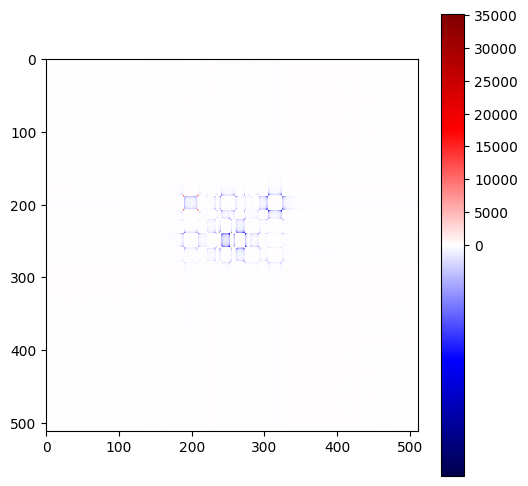

In [86]:
norm = TwoSlopeNorm(vmin=np.min(np.real(Spec_10steps)), vcenter=0, vmax=np.max(np.real(Spec_10steps)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(Spec_10steps), cmap='seismic',norm=norm)
plt.colorbar()
plt.show()

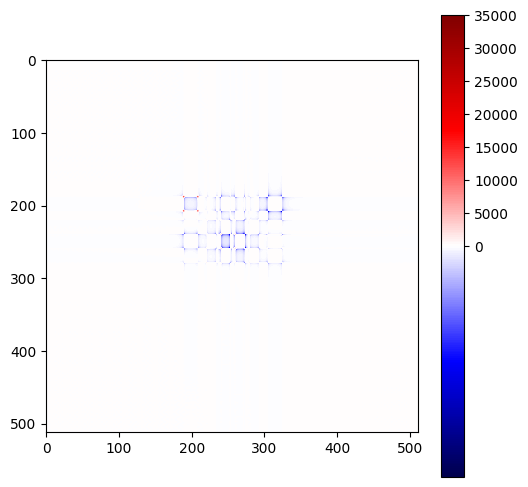

In [128]:
f = open('./data/20NTrotmax_ALA.pk','rb')
dat = pickle.load(f)

fid_1_20Steps = dat['fid_1']
fid_2_20Steps = dat['fid_2']
fid_3_20Steps = dat['fid_3']
fid_4_20Steps = dat['fid_4']

###Calculation of spectrum...


Spec_20steps = -1.0*GenNOESYSpectrum_fromFID(fid_1_20Steps, fid_2_20Steps, fid_3_20Steps, fid_4_20Steps,512,512,returnFID=False)

norm = TwoSlopeNorm(vmin=np.min(np.real(Spec_20steps)), vcenter=0, vmax=np.max(np.real(Spec_20steps)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(Spec_20steps), cmap='seismic',norm=norm)
plt.colorbar()
plt.show()



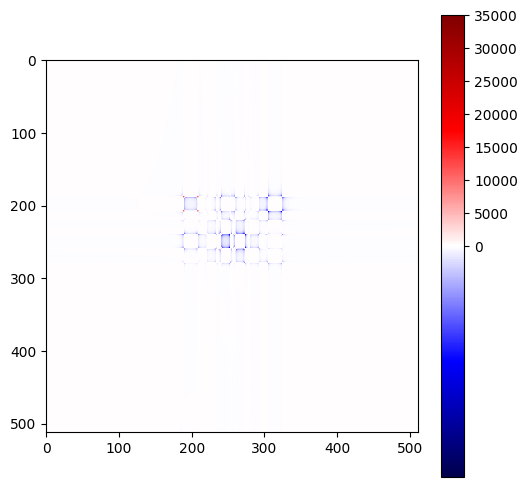

In [129]:
f = open('./data/100NTrotmax_ALA.pk','rb')
dat = pickle.load(f)

fid_1_100Steps = dat['fid_1']
fid_2_100Steps = dat['fid_2']
fid_3_100Steps = dat['fid_3']
fid_4_100Steps = dat['fid_4']

###Calculation of spectrum...

Spec_100steps = -1.0*GenNOESYSpectrum_fromFID(fid_1_100Steps, fid_2_100Steps, fid_3_100Steps, fid_4_100Steps,512,512,returnFID=False)

norm = TwoSlopeNorm(vmin=np.min(np.real(Spec_100steps)), vcenter=0, vmax=np.max(np.real(Spec_100steps)))

plt.figure(figsize=(6, 6))
plt.imshow(np.real(Spec_100steps), cmap='seismic',norm=norm)
plt.colorbar()
plt.show()


Signature: GetTrotStep(Ham, List_jumps, deltT)
Docstring: <no docstring>
File:      /var/folders/rm/xdxcjr7n7_13f9m1905zyf6c0000gq/T/ipykernel_96194/3472111866.py
Type:      function

In [123]:
####Calibration of Trotter error for different Trotter steps...

Npts =100
taus = np.linspace(5e-4,0.0256,Npts)

epsilon_T = np.zeros(Npts)

rho_init = expm(-1j*Lx*np.pi/2)
for i in range(Npts):

    Prop_Exact = expm((-1j*H_ala+R_trunc)*taus[i])

    Trot_Prop = GetTrotStep(H_ala,JumpOps,taus[i])

    epsilon_T[i] = np.linalg.norm((Prop_Exact-Trot_Prop)@rho_init)



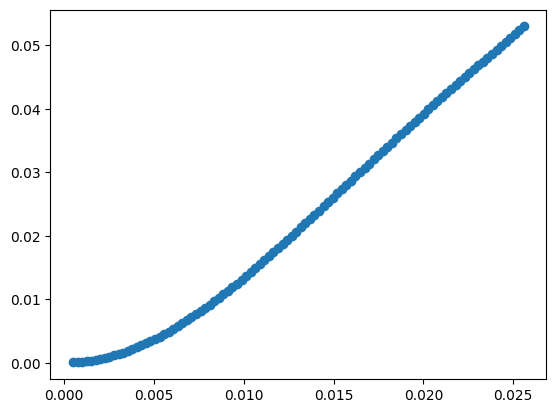

In [124]:
plt.scatter(taus,epsilon_T)

In [114]:
#####Comparison with a randomized Trotter formula, TODO: we can do the same for QDrift....
def Get_RevTrotStep(Ham,List_jumps,deltT):
    
    L_dt1 = expm(-1j*Ham*deltT)

    for i in range(len(List_jumps)):
        #print("Jump operator is",List_jumps[i])
        L_dt1 = L_dt1@expm(List_jumps[i]*deltT)

    return L_dt1


def Get_RandFWTrotStep(Ham,List_jumps,deltT):

    n_samples = 2

    # Generate 0 or 1 based on uniform probability
    samples = np.random.uniform(0, 1, n_samples) < 0.5
    samples = samples.astype(int)

    #if samples
    TrotStep = np.eye(Ham.shape[0])

    for i in range(n_samples):
        if samples[i]==1:
            Ldt = GetTrotStep(Ham,List_jumps,deltT/2.0)
        elif samples[i]==0:
            Ldt = Get_RevTrotStep(Ham,List_jumps,deltT/2.0)

        TrotStep = Ldt@TrotStep
    
    return TrotStep



In [ ]:
0.256

In [125]:
Npts =100
taus = np.linspace(5e-4,0.0256,Npts)
epsilon_RT = np.zeros(Npts)
rho_init = expm(-1j*Lx*np.pi/2)


for i in range(Npts):

    Prop_Exact = expm((-1j*H_ala+R_trunc)*taus[i])

    #Trot_Prop = GetTrotStep(H_ala,JumpOps,taus[i])
    #Trot_Prop = Get_RandFWTrotStep(H_ala,JumpOps,taus[i])
    Fw_Trot = GetTrotStep(H_ala,JumpOps,taus[i])
    Rv_Trot = Get_RevTrotStep(H_ala,JumpOps,taus[i])

    epsilon_RT[i] = np.linalg.norm((Prop_Exact-0.5*Fw_Trot-0.5*Rv_Trot)@rho_init)


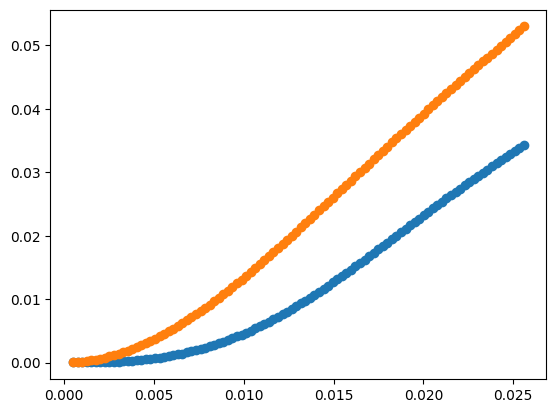

In [127]:
plt.scatter(taus,epsilon_RT)
plt.scatter(taus,epsilon_T)


In [130]:
#scaling of error for a given phase cycle, and choice of Trotter time step, defined as the difference between the FID signal and the one obtained
#through different flavours of Trotterization...

def getTrotFIDCycle1(Ham,JumpOps,t1,t2,tmix,Nsteps1,Nsteps2,Lx,Ly,rho_init,coil,rand=True):

    pulse_90x = expm(-1j*Lx*np.pi/2)
    pulse_90y = expm(-1j*Ly*np.pi/2)

    Rtrunc = sum(JumpOps)

    pulse_mix = expm((-1j*Ham+Rtrunc)*tmix)

    deltT1 = t1/Nsteps1
    deltT2 = t2/Nsteps2 

    Fw_Trot = GetTrotStep(Ham,JumpOps,deltT1)
    if rand:
        Rv_Trot = Get_RevTrotStep(Ham,JumpOps,deltT1)

        L_dt1 = 0.5*(Fw_Trot+Rv_Trot)
        rho_t1 = Trot_evol(L_dt1,rho_init,Nsteps1)
    else:
        rho_t1 = Trot_evol(Fw_Trot,rho_init,Nsteps1)

    rho_t = pulse_90x@rho_t1
    rho_t = pulse_mix@rho_t
    rho_t = pulse_90y@rho_t
    
    Fw_Trot = GetTrotStep(Ham,JumpOps,deltT2)
    if rand:
        #Fw_Trot = GetTrotStep(Ham,JumpOps,deltT2)
        Rv_Trot = Get_RevTrotStep(Ham,JumpOps,deltT2)

        L_dt2 = 0.5*(Fw_Trot+Rv_Trot)
        rho_t = Trot_evol(L_dt2,rho_t,Nsteps2)
    else:
        rho_t = Trot_evol(Fw_Trot,rho_t,Nsteps2)

    ###calculation of expectation value:
    return np.dot(coil,rho_t)

def getFIDCycle1(Ham,JumpOps,t1,t2,tmix,Lx,Ly,rho_init,coil):
    pulse_90x = expm(-1j*Lx*np.pi/2)
    pulse_90y = expm(-1j*Ly*np.pi/2)

    Rtrunc = sum(JumpOps)

    Gen_evol = -1j*Ham+Rtrunc

    pulse_mix = expm(Gen_evol*tmix)

    rho_t = expm(Gen_evol*t1)@rho_init

    rho_t = pulse_90x@rho_t
    rho_t = pulse_mix@rho_t
    rho_t = pulse_90y@rho_t
    rho_t = expm(Gen_evol*t2)@rho_t

    ###calculation of expectation value:
    return np.dot(coil,rho_t)




In [132]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [156]:
###Testing the longest timescales...

Nsteps_scan = np.arange(1,50)
t1=0.256
t2=0.256

rho_init = expm(-1j*Lx*np.pi/2)@rho0

ref_fid = getFIDCycle1(H_ala,JumpOps,t1,t2,tmix,Lx,Ly,rho_init,coil)

epsilon_n = np.zeros(len(Nsteps_scan))
app_fid = np.zeros(len(Nsteps_scan),dtype=complex)

for i in range(len(Nsteps_scan)):
    app_fid[i] = getTrotFIDCycle1(H_ala,JumpOps,t1,t2,tmix,Nsteps_scan[i],Nsteps_scan[i],Lx,Ly,rho_init,coil)[0]
    epsilon_n[i]= np.linalg.norm(ref_fid-app_fid[i])
    epsilon_n[i] = epsilon_n[i]/np.abs(ref_fid)



/var/folders/rm/xdxcjr7n7_13f9m1905zyf6c0000gq/T/ipykernel_96194/2126599362.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  epsilon_n[i] = epsilon_n[i]/np.abs(ref_fid)


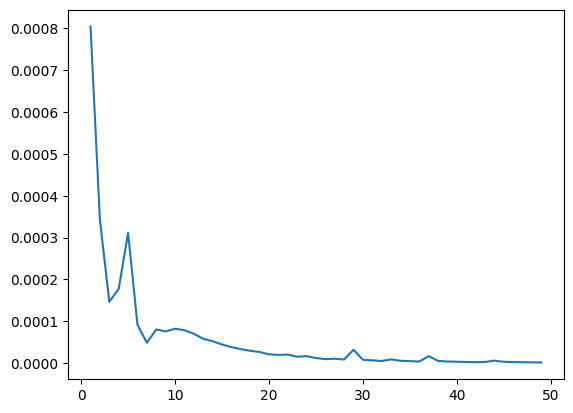

In [157]:
plt.plot(Nsteps_scan,epsilon_n)

In [163]:
getTrotFIDCycle1(H_ala,JumpOps,t1,t2,tmix,2,2,Lx,Ly,rho_init,coil,rand=False)[0]

(-0.39934516733160075+0.7436560233514505j)

In [160]:
app_fid

array([-0.39931989+0.74423126j, -0.39933584+0.74383928j,
       -0.39930662+0.74367595j, -0.3993127 +0.74370171j,
       -0.39923988+0.74380815j, -0.39934659+0.74361427j,
       -0.39930201+0.74359353j, -0.39931234+0.7436192j ,
       -0.39928097+0.74361352j, -0.39930879+0.74362125j,
       -0.39931141+0.74361779j, -0.3993111 +0.74361065j,
       -0.39930745+0.74360094j, -0.39930875+0.74359582j,
       -0.39930685+0.7435894j , -0.39930572+0.74358423j,
       -0.39930559+0.74358001j, -0.39930586+0.74357663j,
       -0.39930651+0.74357403j, -0.3993038 +0.74356976j,
       -0.39930437+0.7435685j , -0.3993067 +0.74356832j,
       -0.39930343+0.74356482j, -0.39930614+0.74356525j,
       -0.39930329+0.7435623j , -0.399302  +0.7435602j ,
       -0.39930354+0.74356059j, -0.3993023 +0.74355938j,
       -0.39927355+0.74354809j, -0.39930308+0.74355848j,
       -0.39930218+0.74355763j, -0.39930065+0.74355673j,
       -0.39930458+0.74355847j, -0.39930243+0.74355658j,
       -0.39930182+0.74355603j,

In [139]:
epsilon_n.argmin()

48

# QDrift-based implementation

In [5]:
# QDrift implementation.

def Samp_Gates(ListGates,List_weights,N):
    #Return a QDrift product formula that simulates a target time T using N samples drawn from the probability distribution...

    Gamma = np.sum(List_weights)
    prob_dist = (1.0/Gamma)*np.array(List_weights)

    #Draw a sample of size N for the implementation of the product formula...
    values = np.arange(len(ListGates))
    samples = np.random.choice(values, size=N, p=prob_dist)
    
    #print("Indixes of gates sampled:",samples)
    drawn_jumps = []
    for i in range(len(samples)):
        if samples[i]!=0:
            drawn_jumps.append(samples[i])

    print("Indices of jump operators drwan during construction of QDrift channel", drawn_jumps)

    ProdF = np.copy(ListGates[samples[0]])
    for i in range(1,N):
        ProdF=ListGates[samples[i]]@ProdF

    return ProdF


def Normalize_and_weightOps(ListOps):
    """
    ListOps contains the generators of evolution, either the representation of the coherent part of evolution or the jump operators 
    """
    List_weights=[]

    for i in range(len(ListOps)):
        List_weights.append(np.max(np.abs(np.linalg.eigvals(ListOps[i]))))

    #Normalize the operator according to the weights...
    Norm_ops =[]

    for i in range(len(ListOps)):
        Norm_ops.append(ListOps[i]/List_weights[i])

    return Norm_ops, List_weights


def QDrift(H0,List_jumps,T,N):


    Norm_ops, List_weights= Normalize_and_weightOps([H0]+List_jumps)

    ###Definition of gates...
    List_Gates = []

    #for i in range(len(List_jumps)):
    #    List_weights.append(rates[i])
    Gamma = np.sum(np.array(List_weights))

    deltaT = T*Gamma/N

    #List_Gates.append(expm(-1j*H0*deltaT))

    for i in range(len(Norm_ops)):
        if i==0:###I assume that the first element of the operators correspond to H0!!!
            List_Gates.append(expm(-1j*Norm_ops[i]*deltaT))
        else:
            List_Gates.append(expm(Norm_ops[i]*deltaT))
        

    ProdF = Samp_Gates(List_Gates,List_weights,N)

    return ProdF

    

In [ ]:
###simulation of the spectrum using Qdrift for the three timescales of the experiment and modifyin 